<a href="https://colab.research.google.com/github/nicoerdmann/Termofluidos/blob/main/Pregunta_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Coolprop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.1 MB/s eta 0:00:00


In [2]:
pip install fluids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.9 MB/s eta 0:00:00


In [3]:
pip install pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 6.9 MB/s eta 0:00:00


In [4]:
import CoolProp.CoolProp as cp
import fluids as fld
import numpy as np
from scipy import constants
from scipy.constants import g
from fluids.units import *
import pint
import matplotlib.pyplot as plt

In [12]:
fluido = 'Water'
material = 'plastic coated'

Para este problema iré sacando la perdida de carga de cada tramo.

In [35]:
Q = 0.00015 * (u.m**3/u.s)
n = 20 #numero de casas
Q_tot = Q * n
D = 0.0254 * (u.m)
A = (np.pi*D**2)/4
Temperatura = 25 + 273.15 #Consideramos temperatura ambiente
P_0 = 101325 * (u.Pa) #Debemos sumar la presión atmosférica
epsilon = fld.material_roughness(material)*u.m
rho = cp.PropsSI('D','T', Temperatura, 'P',P_0.magnitude, fluido)*u.kg/u.m**3
mu = cp.PropsSI('V','T', Temperatura, 'P',P_0.magnitude, fluido)*u.Pa*u.s

In [39]:
#Tramo 1:

Q1 = 20 * Q
V1 = Q1/A
Re1 = (fld.Reynolds(D, rho, V1, mu)).to('dimensionless') #Ir modificando V
f1 = fld.friction.friction_factor(Re1, eD=epsilon/D, Method='Colebrook') #Ir modificando Re
L1 = 5.53 * (u.m)
DELTA_P_1 = ((f1 * L1 * rho * V1**2)/(2 * D)).to(u.kPa) #Modifico f, L, V
print(DELTA_P_1)

#Tramo 2:

Q2 = 5 * Q
V2 = Q2/A
Re2 = (fld.Reynolds(D, rho, V2, mu)).to('dimensionless')
f2 = fld.friction.friction_factor(Re2, eD=epsilon/D, Method='Colebrook')
L2 = 5.53 * (u.m)
DELTA_P_2 = ((f1 * L2 * rho * V2**2)/(2 * D)).to(u.kPa)


153.90758784193062 kilopascal


In [57]:
# Lista de tramos (Q y L)
tramos = [
    {"Q": 20, "L": 5.53}, {"Q": 5, "L": 17.23}, {"Q": 1, "L": 4.6}, {"Q": 4, "L": 27.3}, {"Q": 1, "L": 12.04},
    {"Q": 3, "L": 3.17}, {"Q": 2, "L": 14.5}, {"Q": 1, "L": 91.33}, {"Q": 1, "L": 158.65}, {"Q": 1, "L": 222.16},
    {"Q": 15, "L": 27.68}, {"Q": 4, "L": 17.27}, {"Q": 2, "L": 1.88}, {"Q": 1, "L": 29.37}, {"Q": 1, "L": 44.99},
    {"Q": 2, "L": 29.65}, {"Q": 1, "L": 110.27}, {"Q": 1, "L": 22.36}, {"Q": 11, "L": 22.12}, {"Q": 1, "L": 41.89},
    {"Q": 10, "L": 68}, {"Q": 1, "L": 14.31}, {"Q": 9, "L": 3.2}, {"Q": 2, "L": 14.09}, {"Q": 1, "L": 19.98},
    {"Q": 1, "L": 8.95}, {"Q": 7, "L": 21.79}, {"Q": 1, "L": 5.85}, {"Q": 6, "L": 15.67}, {"Q": 1, "L": 5.89},
    {"Q": 5, "L": 22.7}, {"Q": 1, "L": 73.05}, {"Q": 4, "L": 14.28}, {"Q": 2, "L": 2.06}, {"Q": 1, "L": 5.05},
    {"Q": 1, "L": 3.05}, {"Q": 2, "L": 1.95}, {"Q": 1, "L": 3.05}, {"Q": 1, "L": 17.89}
]

# Función para calcular la pérdida de presión en un tramo
def calcular_delta_P(Q_factor, L_factor, tramo_num):
    # Caudal volumétrico
    Q_tramo = Q_factor * Q  # Escalamos Q por el factor de cada tramo
    V_tramo = Q_tramo / A  # Velocidad del flujo

    # Número de Reynolds
    Re_tramo = (fld.Reynolds(D, rho, V_tramo, mu)).to('dimensionless')

    # Factor de fricción Colebrook
    f_tramo = fld.friction.friction_factor(Re_tramo, eD=epsilon/D, Method='Colebrook')

    # Longitud del tramo en metros
    L_tramo = L_factor * u.m

    # Pérdida de presión
    DELTA_P_tramo = ((f_tramo * L_tramo * rho * V_tramo**2) / (2 * D)).to(u.kPa)

    # Impresión de resultados para cada tramo
    print(f"Tramo {tramo_num}: Pérdida de presión = {DELTA_P_tramo:.2f}")

# Cálculo de las pérdidas de presión para cada tramo
for i, tramo in enumerate(tramos):
    Q_factor = tramo['Q']
    L_factor = tramo['L']
    calcular_delta_P(Q_factor, L_factor, i+1)

Tramo 1: Pérdida de presión = 153.91 kilopascal
Tramo 2: Pérdida de presión = 30.66 kilopascal
Tramo 3: Pérdida de presión = 0.36 kilopascal
Tramo 4: Pérdida de presión = 31.32 kilopascal
Tramo 5: Pérdida de presión = 0.95 kilopascal
Tramo 6: Pérdida de presión = 2.07 kilopascal
Tramo 7: Pérdida de presión = 4.30 kilopascal
Tramo 8: Pérdida de presión = 7.18 kilopascal
Tramo 9: Pérdida de presión = 12.47 kilopascal
Tramo 10: Pérdida de presión = 17.47 kilopascal
Tramo 11: Pérdida de presión = 434.47 kilopascal
Tramo 12: Pérdida de presión = 19.81 kilopascal
Tramo 13: Pérdida de presión = 0.56 kilopascal
Tramo 14: Pérdida de presión = 2.31 kilopascal
Tramo 15: Pérdida de presión = 3.54 kilopascal
Tramo 16: Pérdida de presión = 8.80 kilopascal
Tramo 17: Pérdida de presión = 8.67 kilopascal
Tramo 18: Pérdida de presión = 1.76 kilopascal
Tramo 19: Pérdida de presión = 187.42 kilopascal
Tramo 20: Pérdida de presión = 3.29 kilopascal
Tramo 21: Pérdida de presión = 476.83 kilopascal
Tramo 22:

Ahora defino los valores de los tramos y calculo la perdida de cada casa en base al recorrido del agua.

In [62]:
tramo_perdidas = [
    153.91, 30.66, 0.36, 31.32, 0.95, 2.07, 4.30, 7.18, 12.47, 17.47,
    434.47, 19.81, 0.56, 2.31, 3.54, 8.80, 8.67, 1.76, 187.42, 3.29,
    476.83, 1.13, 18.21, 4.18, 1.57, 0.70, 75.36, 0.46, 39.96, 0.46,
    40.40, 5.74, 16.38, 0.61, 0.40, 0.24, 0.58, 0.24, 1.41
]

recorridos = {
    1: [1, 2, 4, 6, 7, 8],
    2: [1, 2, 4, 6, 7, 9],
    3: [1, 11, 12, 13, 15],
    4: [1, 11, 12, 13, 14],
    5: [1, 11, 12, 16, 17],
    6: [1, 11, 12, 16, 18],
    7: [1, 11, 19, 21, 23, 24, 25],
    8: [1, 11, 19, 21, 23, 24, 26],
    9: [1, 11, 19, 21, 23, 27, 29, 31, 33, 34, 35],
    10: [1, 11, 19, 21, 23, 27, 29, 31, 33, 34, 36],
    11: [1, 11, 19, 21, 23, 27, 29, 31, 33, 37, 38],
    12: [1, 11, 19, 21, 23, 27, 29, 31, 33, 37, 39],
    13: [1, 2, 4, 6, 10],
    14: [1, 2, 4, 5],
    15: [1, 2, 3],
    16: [1, 11, 19, 20],
    17: [1, 11, 19, 21, 22],
    18: [1, 11, 19, 21, 23, 27, 28],
    19: [1, 11, 19, 21, 23, 27, 29, 30],
    20: [1, 11, 19, 21, 23, 27, 29, 31, 32]
}

# Calcular y mostrar la pérdida de carga total para cada casa
for casa, tramos_casa in recorridos.items():
    perdida_total = sum(tramo_perdidas[tramo - 1] for tramo in tramos_casa)  # tramo-1 por indexación de Python
    print(f"Pérdida total de carga por roce para la casa {casa}: {perdida_total:.2f} kPa")


Pérdida total de carga por roce para la casa 1: 229.44 kPa
Pérdida total de carga por roce para la casa 2: 234.73 kPa
Pérdida total de carga por roce para la casa 3: 612.29 kPa
Pérdida total de carga por roce para la casa 4: 611.06 kPa
Pérdida total de carga por roce para la casa 5: 625.66 kPa
Pérdida total de carga por roce para la casa 6: 618.75 kPa
Pérdida total de carga por roce para la casa 7: 1276.59 kPa
Pérdida total de carga por roce para la casa 8: 1275.72 kPa
Pérdida total de carga por roce para la casa 9: 1443.95 kPa
Pérdida total de carga por roce para la casa 10: 1443.79 kPa
Pérdida total de carga por roce para la casa 11: 1443.76 kPa
Pérdida total de carga por roce para la casa 12: 1444.93 kPa
Pérdida total de carga por roce para la casa 13: 235.43 kPa
Pérdida total de carga por roce para la casa 14: 216.84 kPa
Pérdida total de carga por roce para la casa 15: 184.93 kPa
Pérdida total de carga por roce para la casa 16: 779.09 kPa
Pérdida total de carga por roce para la cas

In [64]:
# Diferencias de altura en metros para cada casa
alturas = {
    1: -2.11,
    2: -0.81,
    3: 0.313,
    4: 1.546,
    5: 3.197,
    6: 3.665,
    7: 6.49,
    8: 7.344,
    9: 9.69,
    10: 9.71,
    11: 10.9,
    12: 11,
    13: -5.5,
    14: -1.85,
    15: -0.81,
    16: 2.66,
    17: 6.49,
    18: 7.9,
    19: 9.49,
    20: 11
}

def calcular_perdida_por_altura(altura, rho):
    g = 9.81  # Aceleración por la gravedad en m/s^2
    return rho * g * altura / 1000  # Conversión a kilopascales

# Calcula la pérdida total incluyendo la elevación para cada casa
perdidas_totales_con_altura = {}
for casa, tramos_casa in recorridos.items():
    perdida_por_tramos = sum(tramo_perdidas[tramo - 1] for tramo in tramos_casa)  # Suma de pérdidas por tramos
    altura_casa = alturas[casa]  # Obtener la altura de la casa actual
    perdida_por_altura = calcular_perdida_por_altura(altura_casa, rho.magnitude)  # Calcular la pérdida por la altura
    perdida_total = perdida_por_tramos + perdida_por_altura  # Suma de pérdida por tramos y altura
    perdidas_totales_con_altura[casa] = perdida_total

# Imprimir los resultados
for casa, perdida in perdidas_totales_con_altura.items():
    print(f"Pérdida total de carga para la casa {casa} (incluyendo elevación): {perdida:.2f} kPa")


Pérdida total de carga para la casa 1 (incluyendo elevación): 208.80 kPa
Pérdida total de carga para la casa 2 (incluyendo elevación): 226.81 kPa
Pérdida total de carga para la casa 3 (incluyendo elevación): 615.35 kPa
Pérdida total de carga para la casa 4 (incluyendo elevación): 626.18 kPa
Pérdida total de carga para la casa 5 (incluyendo elevación): 656.93 kPa
Pérdida total de carga para la casa 6 (incluyendo elevación): 654.60 kPa
Pérdida total de carga para la casa 7 (incluyendo elevación): 1340.07 kPa
Pérdida total de carga para la casa 8 (incluyendo elevación): 1347.55 kPa
Pérdida total de carga para la casa 9 (incluyendo elevación): 1538.73 kPa
Pérdida total de carga para la casa 10 (incluyendo elevación): 1538.76 kPa
Pérdida total de carga para la casa 11 (incluyendo elevación): 1550.37 kPa
Pérdida total de carga para la casa 12 (incluyendo elevación): 1552.52 kPa
Pérdida total de carga para la casa 13 (incluyendo elevación): 181.63 kPa
Pérdida total de carga para la casa 14 (i

In [66]:
# Encontrar la pérdida máxima y la casa correspondiente
max_perdida = max(perdidas_totales_con_altura.values())
casa_max_perdida = max(perdidas_totales_con_altura, key=perdidas_totales_con_altura.get)  # Encuentra la clave con el valor máximo

print(f"La máxima pérdida de carga en el sistema es de {max_perdida:.2f} kPa, correspondiente a la casa {casa_max_perdida}.")


La máxima pérdida de carga en el sistema es de 1552.52 kPa, correspondiente a la casa 12.


Si graficamos esto se ve asi:

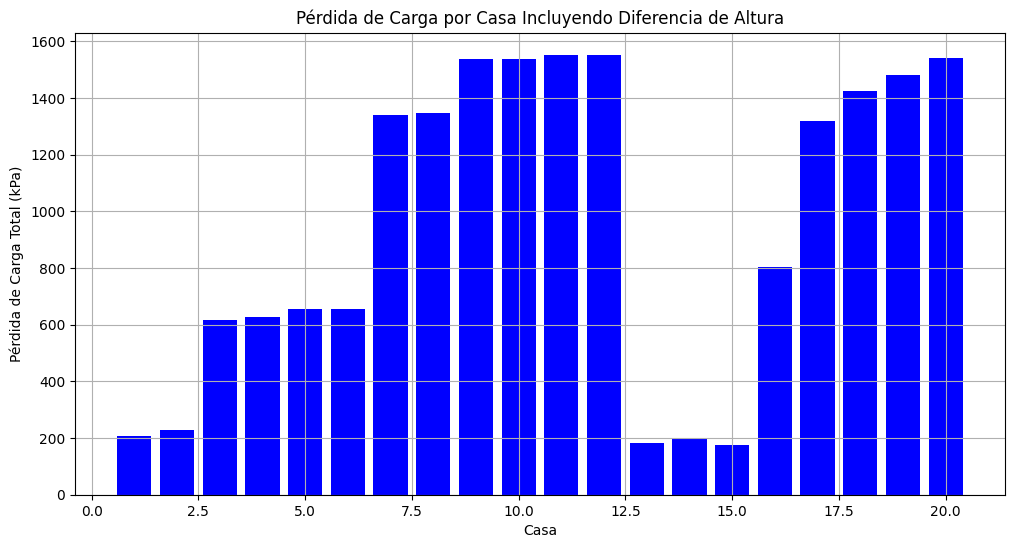

In [65]:
import matplotlib.pyplot as plt

# Extraer datos para graficar
casas = list(perdidas_totales_con_altura.keys())
perdidas = [perdidas_totales_con_altura[casa] for casa in casas]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(casas, perdidas, color='blue')
plt.xlabel('Casa')
plt.ylabel('Pérdida de Carga Total (kPa)')
plt.title('Pérdida de Carga por Casa Incluyendo Diferencia de Altura')
plt.grid(True)
plt.show()
